# Covariance and Correlation

## Example

We will look at a dataset containing of measurements of heights and middle finger lengths for 3000 men (this is adapted from a dataset bizarrely recorded for jail inmates 1902 - W. R. MacDonell (Biometrika, Vol. I., p. 219)). 


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme() # use pretty defaults

### Load and inspect the data

Load the data from the file HeightFinger.csv

In [2]:
heightFinger = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/HeightFingerInches.csv')
display(heightFinger)

,Height,FingerLength
0,56,3.875
1,57,4.000
2,58,3.875
3,58,4.000
4,58,4.000
...,...,...
2995,74,4.875
2996,74,5.000
2997,74,5.000
2998,74,5.250


The height data are in inches and are rounded to the nearest inch. 

Finger lengths are in inches and rounded to the nearest 1/8 of an inch.

### Plot the data

Let's plot the data. A scatterplot is usually a good choice for bivariate data such as these.

<AxesSubplot:xlabel='Height', ylabel='FingerLength'>

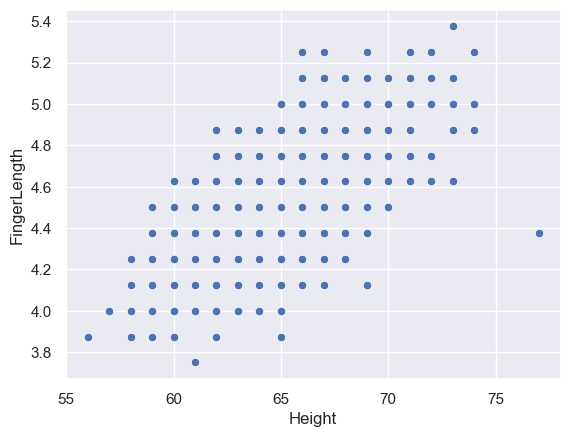

In [3]:
sns.scatterplot(data=heightFinger, x='Height', y='FingerLength')

Hm, that looks strange. Because data were rounded to the nearest inch or 1/8th inch, the data points appear to be on a regular grid. 

One consequence of this is that some datapoints will fall exactly on top of each other! You can see this if I make the data points a bit transparent (by using the alpha parameter) so that the dots appear darker where several fall on top of eachother

<AxesSubplot:xlabel='Height', ylabel='FingerLength'>

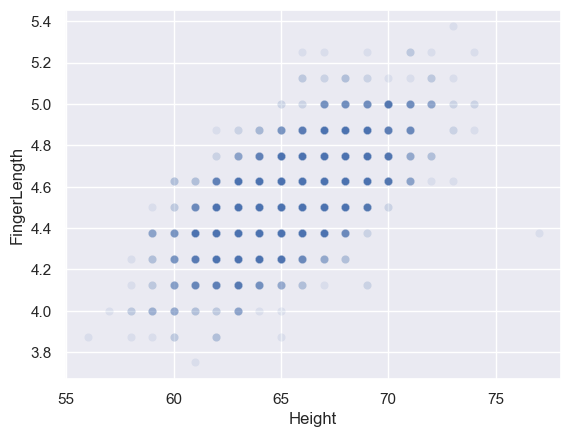

In [4]:
sns.scatterplot(data=heightFinger, x='Height', y='FingerLength', alpha=0.1)

Alternatively, we can visualise the data using another type of plot such as a 2D KDE plot - this is a good solution if the dataset is very large

<AxesSubplot:xlabel='Height', ylabel='FingerLength'>

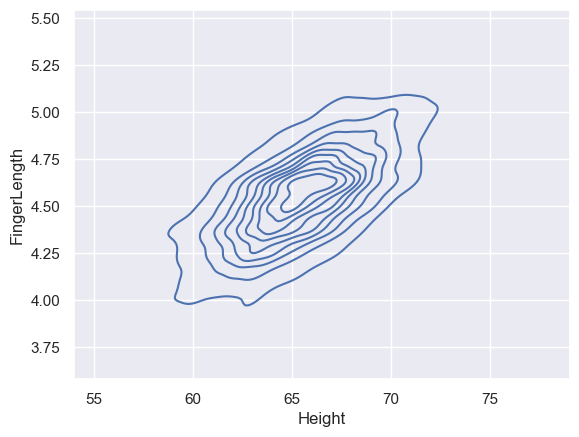

In [5]:
sns.kdeplot(data=heightFinger, x='Height', y='FingerLength')

## Covariance

We can see there is probably some covariance between height and middle finger length, as tall people tend to have long fingers.

We can calculate the covariance using a built in function from <tt>pandas</tt>

In [6]:
heightFinger.cov()

,Height,FingerLength
Height,6.542118,0.359824
FingerLength,0.359824,0.046754


This calculates the <b>covariance matrix</b>

<ul>
<li>The entry for height vs height (top left) is simply the variance of the distribution of heights
<li>The entry for FingerLength vs FingerLength (bottom right) is simply the variance of the distribution of finger lengths
<li>The (identical) entries for height vs finger length are the covariance between the two. 
</ul>

You can check that the Height-Height and FingerLength-FingerLength entries are indeed the relevant variances, using the function <tt>std</tt> to obtain the standard deviation $s$ - the variance is then $s^2$

In [7]:
heightFinger['Height'].std()**2

6.542118372790553

### Use the formula

Just for our own understanding, let's calculate the covariance ourselves using the formula:

$$ s_{xy} = \sum{\frac{(x_i - \bar{x})(y_i - \bar{y})}{n-1}} $$

In [8]:
# Work out the mean in x and y
mx = heightFinger['Height'].mean()
my = heightFinger['FingerLength'].mean()

print('mean height = ' + str(mx) + ' inches')
print('mean finger length = ' + str(my) + ' mm')

# Make new columns in the data frame for the deviations in x and y
heightFinger['devHeight'] = heightFinger['Height']-mx
heightFinger['devFinger'] = heightFinger['FingerLength']-my

display(heightFinger)

mean height = 65.473 inches
mean finger length = 4.547666666666666 mm


,Height,FingerLength,devHeight,devFinger
0,56,3.875,-9.473,-0.672667
1,57,4.000,-8.473,-0.547667
2,58,3.875,-7.473,-0.672667
3,58,4.000,-7.473,-0.547667
4,58,4.000,-7.473,-0.547667
...,...,...,...,...
2995,74,4.875,8.527,0.327333
2996,74,5.000,8.527,0.452333
2997,74,5.000,8.527,0.452333
2998,74,5.250,8.527,0.702333


Check you understand what the deviations are. For example:
<ul>
    <li>the person in row 1 has height 57 inches, which is below the mean of 65.473 inches, so his deviation in height is -8.473
    <li>the person in row 2999 has height 77 inches, which is above the mean of 65.473 inches, so his deviation in height is 11.527
</ul>

Now we can apply the equation:

In [9]:
# get n
n = len(heightFinger)

# Equation for covariance
s_xy =  sum(heightFinger['devHeight']*heightFinger['devFinger'])/(n-1)
print('covariance = ' + str(s_xy))

covariance = 0.3598236078692932


Ta-daa! This should match what you got with the built in function <tt>df.covariance</tt> above

## Correlation

Correlation is a scaled or normalized form of covariance, that does not change if the units of the variables $x$ and $y$ changes

We can calulate the correlation using a built in function of <tt>pandas</tt>:

In [10]:
# reload the data to get rid of the extra columns we added just now
heightFinger = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/HeightFingerInches.csv')
heightFinger.corr()

,Height,FingerLength
Height,1.000000,0.650611
FingerLength,0.650611,1.000000


The correlation between height and finger length is $r$=0.65 (We usually use the symbol $r$ for correlation)

Once again we can check that this matches what we should get with the formula:

$$ r = \frac{s_{xy}}{s_x s_y} $$

where $s_{xy}$ is the covariance as above:
    
$$ s_{xy} = \sum{\frac{(x_i - \bar{x})(y_i - \bar{y})}{n-1}} $$

... and $s_x$, $s_y$ are the standard deviations of the two datasets (height and finger length)

In [11]:
s_x = heightFinger['Height'].std()
s_y = heightFinger['FingerLength'].std()
# s_xy, the covariance, was calculated above

r = s_xy/(s_x * s_y)
print('The correlation is ' + str(r))

The correlation is 0.6506112650191417


Ta-daa, hopefully this matches the output of the built in function above.

# Corr vs Cov

When should you use the correlation, when would you use the covariance?

### Changing units

If we change the units of one of our variables, this changes the covariance but not the correlation.

Let's convert the finger length data to cm using the conversion 1 inch = 2.54 cm

In [12]:
heightFinger['FingerLength'] = heightFinger['FingerLength']*2.54 
display(heightFinger)

,Height,FingerLength
0,56,9.8425
1,57,10.1600
2,58,9.8425
3,58,10.1600
4,58,10.1600
...,...,...
2995,74,12.3825
2996,74,12.7000
2997,74,12.7000
2998,74,13.3350


Now we recalculate the covariance

In [13]:
heightFinger.cov()

,Height,FingerLength
Height,6.542118,0.913952
FingerLength,0.913952,0.301637


... and the correlation

In [14]:
heightFinger.corr()

,Height,FingerLength
Height,1.000000,0.650611
FingerLength,0.650611,1.000000


We can see that the covariance changes when we change the units, but correlation doesn't change. 

### Interpreting covariance - the slope

You may be asking, why would we ever use covariance?

The answer is that the covariance tells us something about how much $y$ increases with $x$ and vice versa.

If we apply the equation

$$ b = s_{xy}/s^2_{x} $$

we get a coefficient $b$ which tells us how many units $y$ increases, for one unit increase in $x$.

In [15]:
b = s_xy/(s_x**2)
print(b)

0.055001084872729034


For every extra 1 inch of height, finger length increases by 0.055 inches.

This is actually a regression coefficient (there will be much more detail on this later in the course) and we can see if we plot a regression line that b is its slope:

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/regFingerHeight.png" width="70%"/>

Conversely:

In [16]:
b = s_xy/(s_y**2)
print(b)

7.6961212519589495


for every extra inch in finger length, height increases by 7.70 inches.

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/regHeightFinger.png" width="70%"  />

Now, if we were to convert our finger measurements to cm instead of inches, the coviariance would change, and so would our slop - because a one cm increase in finger length is assocated with a smaller increase in height, than a 1 inch increase in finger length would be.

There will be a whole block on regression later in the course.